In [ ]:
!pip install spacy

!python -m spacy download en_core_web_sm
!pip install googletrans==4.0.0-rc1
!pip install beautifulsoup4
!pip install textblob
!pip install mlxtend
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 28.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.6 MB/s eta 0:0

In [ ]:
pip install googletrans==4.0.0-rc1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import preprocess_kgptalkie as ps

# New Section

In [ ]:
import pandas as pd
df=pd.read_csv("sentiment1.csv")



In [ ]:
df.head()

,text,sentiment,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Last session of the day http://twitpic.com/67ezh,neutral,NaN,NaN,NaN,NaN,NaN,NaN
1,Shanghai is also really exciting (precisely -...,positive,NaN,NaN,NaN,NaN,NaN,NaN
2,"Recession hit Veronique Branquinho, she has to...",negative,NaN,NaN,NaN,NaN,NaN,NaN
3,happy bday!,positive,NaN,NaN,NaN,NaN,NaN,NaN
4,http://twitpic.com/4w75p - I like it!!,positive,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

,0
text,0
sentiment,0
Unnamed: 2,3534
Unnamed: 3,3534
Unnamed: 4,3534
Unnamed: 5,3534
Unnamed: 6,3534
Unnamed: 7,3534


<Axes: xlabel='sentiment'>

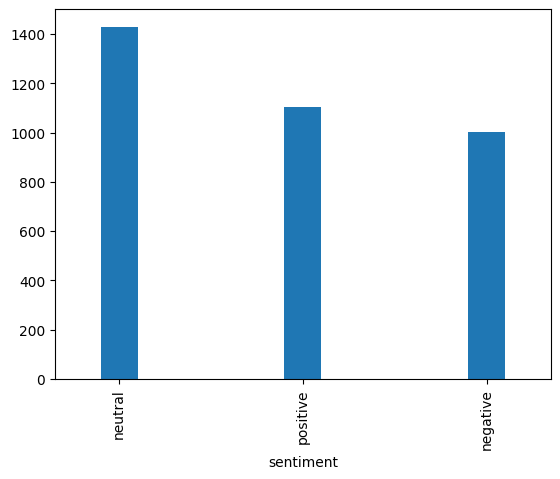

In [ ]:
df['sentiment'].value_counts().plot(kind='bar',width=.2)

Text(0.5, 1.0, 'label distribution')

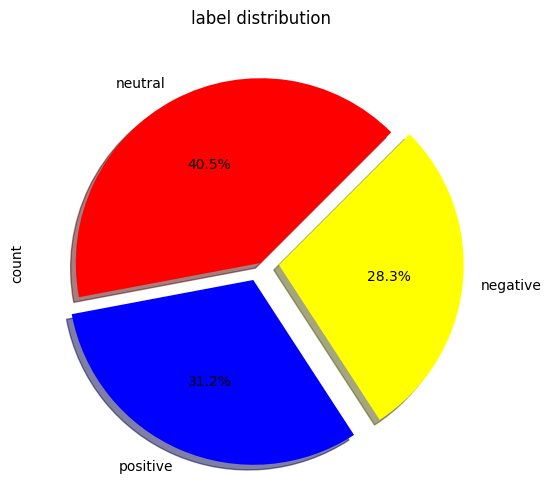

In [ ]:
plt.figure(figsize=(10,6))
colors=['red','blue','yellow']
df['sentiment'].value_counts().plot(kind='pie',autopct='%.1f%%',shadow=True,colors=colors,startangle=45,explode=(0,0.1,0.1))
plt.title('label distribution')

In [ ]:

import re

In [ ]:
df['word_counts'] = df['review'].apply(lambda x: ps.word_count(x))
df['char_counts'] = df['review'].apply(lambda x: ps.char_count(x))
df['avg_wordlength'] = df['review'].apply(lambda x: ps.avg_word_len(x))
df['stopwords_counts'] = df['review'].apply(lambda x: ps.stop_words_count(x))

df['review'] = df['review'].apply(lambda x: ps.remove_html_tags(x))
df['review'] = df['review'].str.lower()

In [8]:
df['word_counts'] = df['text'].apply(lambda x: ps.word_count(x))
df['char_counts'] = df['text'].apply(lambda x: ps.char_count(x))
df['avg_wordlength'] = df['text'].apply(lambda x: ps.avg_word_len(x))
df['stopwords_counts'] = df['text'].apply(lambda x: ps.stop_words_count(x))

df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].str.lower()

/usr/local/lib/python3.10/dist-packages/preprocess_kgptalkie/text_preprocess.py:92: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text()


In [9]:
df['review_without_stopwords'] = df['text'].apply(lambda x: ps.remove_stop_words(x))

In [10]:
df.head(1)

,text,sentiment,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,word_counts,char_counts,avg_wordlength,stopwords_counts,review_without_stopwords
0,last session of the day http://twitpic.com/67ezh,neutral,NaN,NaN,NaN,NaN,NaN,NaN,6,43,7.166667,3,session day http://twitpic.com/67ezh


In [11]:
df.columns

Index(['text', 'sentiment', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'word_counts', 'char_counts',
       'avg_wordlength', 'stopwords_counts', 'review_without_stopwords'],
      dtype='object')

In [12]:
import seaborn as sns

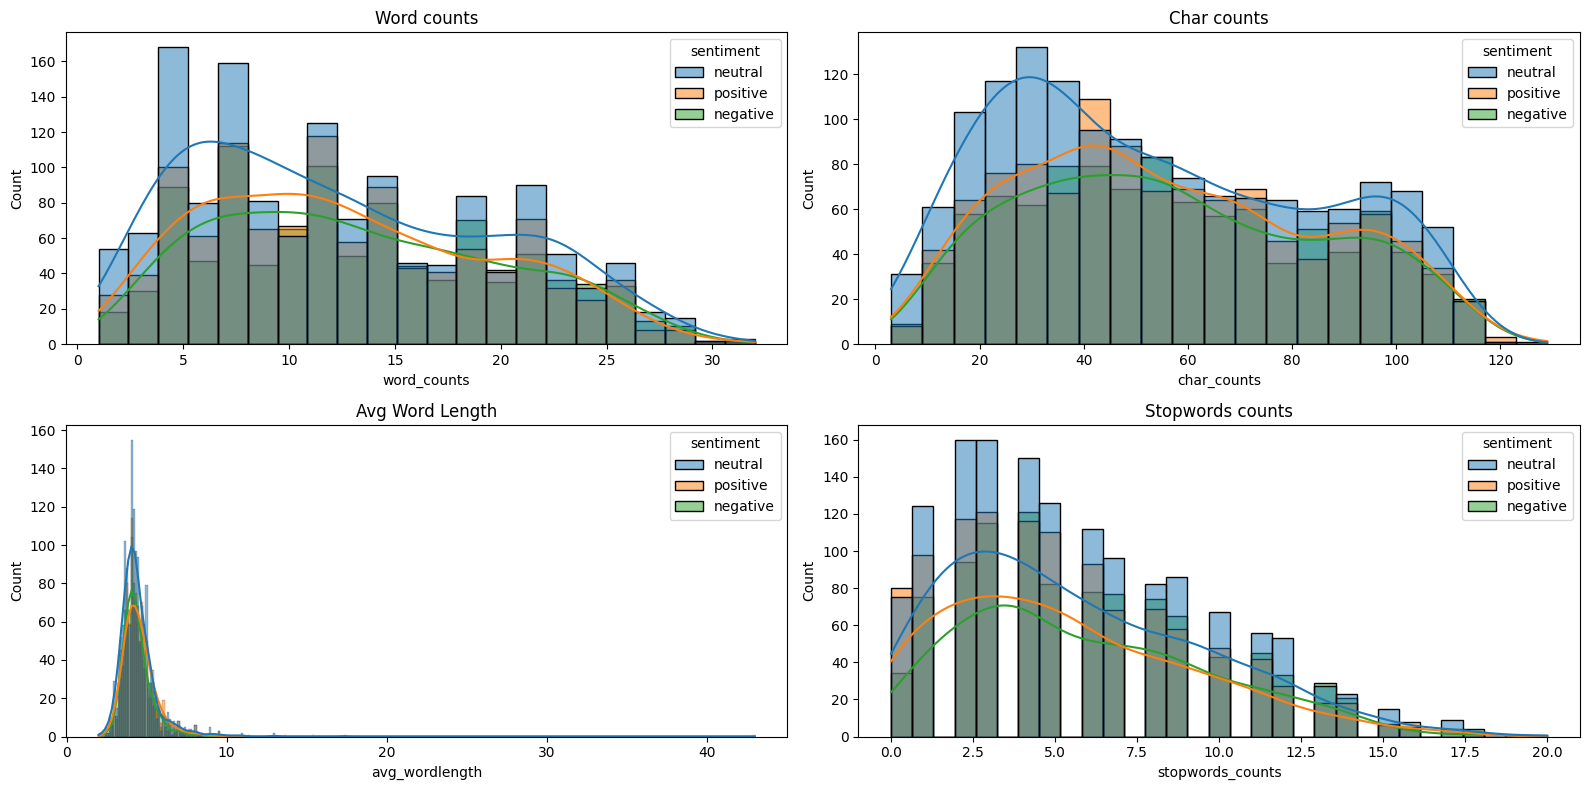

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
# sns.barplot(x='sentiment', y='word_counts', data=df)
sns.histplot(data=df, x='word_counts', hue='sentiment', kde=True)
plt.title('Word counts')

plt.subplot(2,2,2)
sns.histplot(data=df, x='char_counts', hue='sentiment', kde=True)
plt.title('Char counts')

plt.subplot(2,2,3)
sns.histplot(data=df, x='avg_wordlength', hue='sentiment', kde=True)
plt.title('Avg Word Length')

plt.subplot(2,2,4)
sns.histplot(data=df, x='stopwords_counts', hue='sentiment', kde=True)
plt.title('Stopwords counts')

plt.tight_layout()
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df['text'],
                                                    df['sentiment'],
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=df['sentiment']
                                                   )

In [16]:
X_train.shape, X_test.shape

((2827,), (707,))

In [17]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [18]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [19]:
y_pred = clf.predict(X_test)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.62      0.58      0.60       200
     neutral       0.55      0.58      0.57       286
    positive       0.67      0.66      0.67       221

    accuracy                           0.61       707
   macro avg       0.61      0.61      0.61       707
weighted avg       0.61      0.61      0.61       707



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

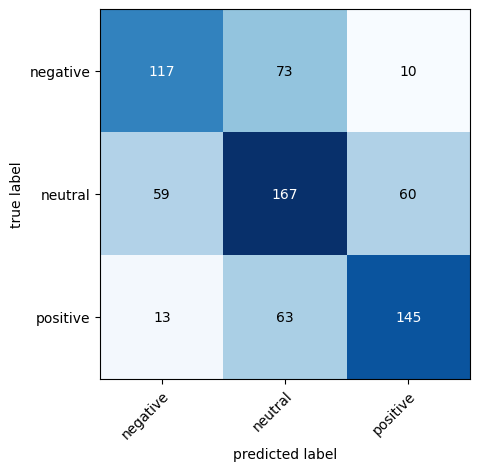

In [21]:
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names=clf.classes_)

In [22]:
clf.predict(['miss you'])

array(['negative'], dtype=object)

In [23]:
clf.predict(['happy birthday'])

array(['positive'], dtype=object)

In [24]:
import pickle

pickle.dump(clf, open('sentiment3.pkl', 'wb'))